In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Homework 5

## Problem 1

### (a)

If we adding an offset to the dataset, the dataset should still be linealy separable, so the hard-margin SVM can still find a solution.

### (b)

After a lower dimensional transformation, the data points are not necessarily remain linearly separable, so there is no guarantee that the hard-margin SVM finds a solution

### (c)

The heigh dimensional transformation might leads to a similar problem as subtask (b), if the newly introduced feature makes the data points not linearly separable anymore, SVM cannot then find a solution.

### (d)

If we scaling all the features with a constant $\alpha > 0$, the relative position of the data points remains the same, in such case, there will be a solution for hard-margin SVM

## Problem 2

/home/parallels/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


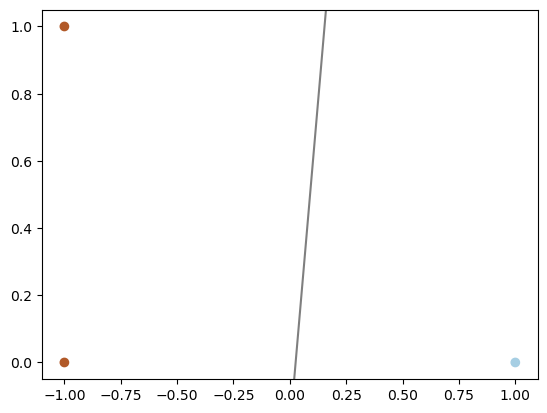

In [18]:
def solveHMSVM(X, y):
  clf = svm.LinearSVC()
  clf.fit(X, y)

  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
  Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

  Z = Z.reshape(xx.shape)
  plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

X_1 = np.array([[-1, 0], [-1, 1], [1, 0]])
y_1 = np.array([1, 1, -1])

solveHMSVM(X_1, y_1)

Then, add an extra smaple

/home/parallels/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


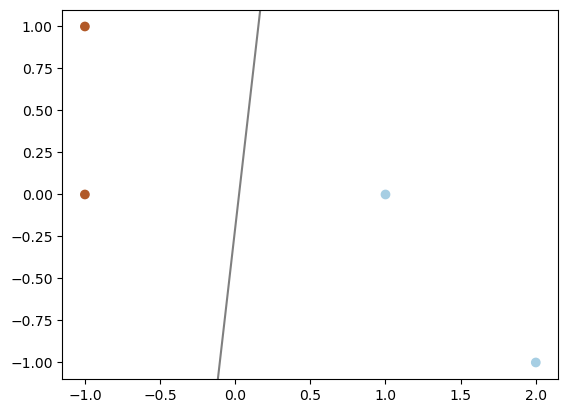

In [19]:
X_2 = np.array([[-1, 0], [-1, 1], [1, 0], [2, -1]])
y_2 = np.array([1, 1, -1, -1])

solveHMSVM(X_2, y_2)

## Problem 3

### 1

By definition, the sum of convex functions are also convex function. Therefore, in order to prove the convexity of the given empirical mean function, we just need to prove that $L(y_i, \left \langle \mathbf{w}, \mathbf{x}_i \right \rangle + b)$ is convex in $\mathbf{\theta} = [b~\mathbf{w}]^\top$.

For readability we rewrite the given function as

$$
L(y_i, \left \langle \mathbf{w}, \mathbf{x}_i \right \rangle + b) = L(y_i, [1, \mathbf{x}_i^\top]\cdot \mathbf{\theta}).
$$

Here, let $[1, \mathbf{x}_i^\top]\cdot \mathbf{\theta} = t$, the function above follows the form of $L(y_i, t)$ and therefore is convex.

Note that, in the function, $t$ is defined as a linear transformation of $\mathbf{\theta}$ by $[1, \mathbf{x}_i^\top]$. Thus the function $L$ is convex in $\mathbf{\theta}$. Therefore the empirical mean of $L$ is also convex in $\mathbf{\theta}$.

### 2

If we choose $L$ to be a log-loss function, then its empirical mean can be rewritten as:

$$
\frac{1}{n} \sum_{i=1}^n \text{log} (1 + e^{-y_i \mathbf{\theta}^\top \mathbf{x_i}'}),
$$

where $\mathbf{x_i}'$ is defined as $[1, \mathbf{x}_i^\top]^{\top}$ for simplicity.

We further numerize the negative likelihood. Given $\mathbf{x}' \in \mathbb{R}^{d+1}$ and $z \in \left\{ 0, 1 \right\}$, assume

$$
\begin{alignat*}{2}
\text{Pr}(z = 1 | \mathbf{x}_i') &= \frac{1}{1 + e^{- \mathbf{\theta}^\top \mathbf{x}_i'}} \\
\text{Pr}(z = 0 | \mathbf{x}_i') &= 1 - \text{Pr}(y = 1 | \mathbf{x}_i') \\
                                  &= \frac{1}{1 + e^{\mathbf{\theta}^\top \mathbf{x}_i'}}.
\end{alignat*}
$$

Then, the likelihood is given and simplified by

$$
\begin{alignat*}{2}
L(\mathbf{\theta}) &= - \sum_{i = 1}^{n}\left[ z_i \cdot \text{log} (1 + e^{- \mathbf{\theta}^\top \mathbf{x}_i'})  + (1 - z_i) \cdot \text{log} (1 + e^{\mathbf{\theta}^\top \mathbf{x}_i')} \right] \\
&= - \sum_{z_i = 1} \text{log} (1 + e^{- \mathbf{\theta}^\top \mathbf{x}_i'}) - \sum_{z_i = 0} \text{log} (1 + e^{\mathbf{\theta}^\top \mathbf{x}_i')}) \\
&= -\left( \sum_{y_i = 1} \text{log} (1 + e^{- \mathbf{\theta}^\top \mathbf{x}_i'}) + \sum_{y_i = -1} \text{log} (1 + e^{\mathbf{\theta}^\top \mathbf{x}_i')}) \right) \\
&= - \sum_{i=1}^n \text{log} (1 + e^{-y_i \mathbf{\theta}^\top \mathbf{x}_i'})
\end{alignat*}
$$

Thus, the negative likelihood is propotional to the empirical mean by a factor $-\frac{1}{n}$